# e-shop clothing 2008

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

sns.set(style='white', context='notebook', palette='deep')

## Understand the Dataset

In [3]:
#load data
df1 = pd.read_excel('ecommerce (RL).xls', skipinitialspace=True)
print("Number of observations:",df1.shape)
df1.head()

Number of observations: (65535, 14)


,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


## Data exploration

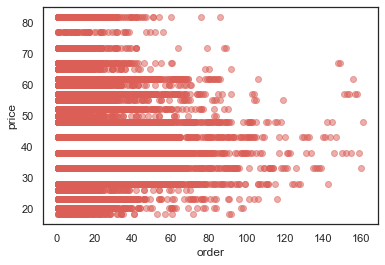

In [69]:
#spread - order & price
plt.scatter(df1["order"], df1["price"], alpha=0.5)
plt.xlabel('order')
plt.ylabel('price')
plt.show()

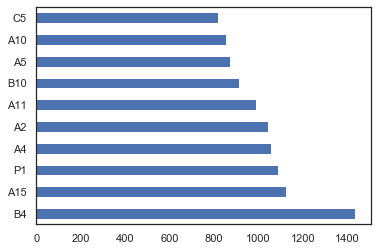

In [4]:
#top10 best selling products 
df1['page 2 (clothing model)'].value_counts().head(10).plot(kind='barh', figsize=(6,4))
plt.show()

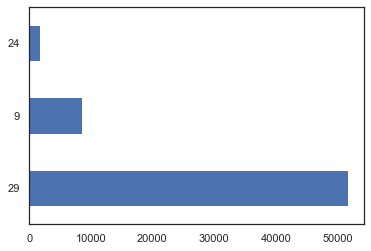

In [5]:
#top3 visiting countries
df1['country'].value_counts().head(3).plot(kind='barh', figsize=(6,4))
plt.show()

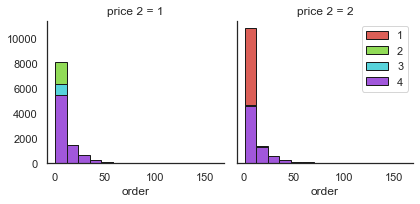

In [6]:
#order vs product category
sns.set_palette(sns.color_palette("hls", 20))
bins = np.linspace(df1.order.min(), df1.order.max(), 15)
g = sns.FacetGrid(df1, col="price 2", hue="page 1 (main category)", palette="hls", col_wrap=2)
g.map(plt.hist, 'order', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Discovery: People natvigate Category 4 (sale) first <br>

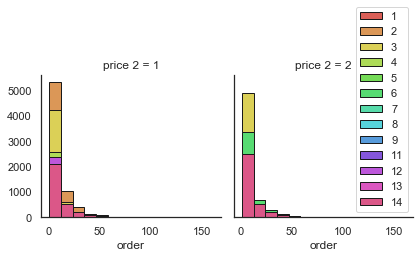

In [7]:
#order vs product colour
sns.set_palette(sns.color_palette("hls", 20))
bins = np.linspace(df1.order.min(), df1.order.max(), 15)
g = sns.FacetGrid(df1, col="price 2", hue="colour", palette="hls", col_wrap=2)
g.map(plt.hist, 'order', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

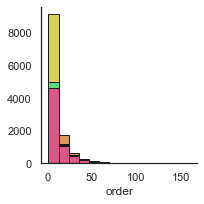

In [8]:
sns.set_palette(sns.color_palette("hls", 20))
bins = np.linspace(df1.order.min(), df1.order.max(), 15)
g = sns.FacetGrid(df1, hue="colour", palette="hls")
g.map(plt.hist, 'order', bins=bins, ec="k")
plt.show()

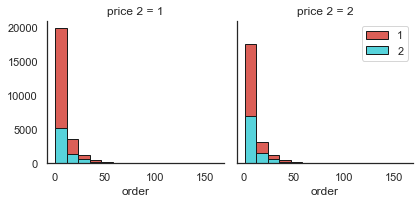

In [9]:
#order vs model photography
sns.set_palette(sns.color_palette("hls", 20))
bins = np.linspace(df1.order.min(), df1.order.max(), 15)
g = sns.FacetGrid(df1, col="price 2", hue="model photography", palette="hls", col_wrap=2)
g.map(plt.hist, 'order', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

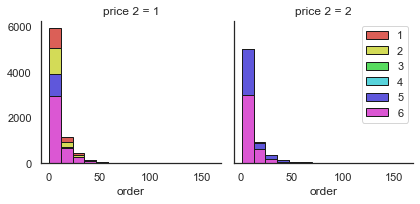

In [10]:
#order vs photo location
sns.set_palette(sns.color_palette("hls", 20))
bins = np.linspace(df1.order.min(), df1.order.max(), 15)
g = sns.FacetGrid(df1, col="price 2", hue="location", palette="hls", col_wrap=2)
g.map(plt.hist, 'order', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Data pre-processing

In [11]:
df2=df1.copy()
df2.drop(columns="page 2 (clothing model)", axis = 1, inplace = True)
print('Dataset with Dropped Labels')
df2.head()

Dataset with Dropped Labels


,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,4,3,2,52,1,1


In [12]:
X = df2.drop(['price 2','year'], axis=1)
y = df2['price 2']  #target variable for prediction

### Split data into separate training and test sets:

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (52428, 11) (52428,)
Test set: (13107, 11) (13107,)


In [70]:
#Data normalization
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.59972953, -1.36714358, -0.70793096,  0.32871753, -1.73637352,
        -1.22488705, -1.24253867,  1.0055067 , -0.58919775, -1.25668761,
        -0.73464719],
       [-0.59972953, -1.36714358, -0.62774178,  0.32871753, -1.73637352,
        -1.22488705, -1.24253867,  1.58955543, -0.58919775, -0.8543836 ,
        -0.73464719],
       [-0.59972953, -1.36714358, -0.54755259,  0.32871753, -1.73637352,
        -0.34917552,  0.86579678, -0.74663948, -0.58919775,  0.67437166,
        -0.73464719],
       [-0.59972953, -1.36714358, -0.4673634 ,  0.32871753, -1.73637352,
        -0.34917552, -0.0712412 ,  1.58955543,  1.69722305, -0.45207958,
        -0.73464719],
       [-0.59972953, -1.36714358, -0.38717422,  0.32871753, -1.73637352,
        -0.34917552, -0.53976018, -0.16259075,  1.69722305,  0.67437166,
        -0.73464719]])

### Model: Logistic Regression

In [50]:
#use logistic regression to predict categorical target
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
LR_yhat_prob

array([[3.42814249e-02, 9.65718575e-01],
       [2.44382361e-02, 9.75561764e-01],
       [9.91971821e-01, 8.02817913e-03],
       ...,
       [2.36817912e-01, 7.63182088e-01],
       [2.08843337e-02, 9.79115666e-01],
       [9.99239031e-01, 7.60968834e-04]])

In [52]:
from sklearn.metrics import f1_score
print ("F1 score: ", f1_score(y_test, LR_yhat, average='weighted'))
from sklearn.metrics import jaccard_similarity_score
print ("Jaccard score:", jaccard_similarity_score(y_test, LR_yhat))

F1 score:  0.9900049085624498
Jaccard score: 0.9900053406576639


C:\Users\joeyl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Model: Random forest

In [60]:
#Random forest algorithm can be used for both classifications and regression. 
#Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_pred = rclf.predict(X_test)

In [62]:
print ("F1 score: ", f1_score(y_test, yhat, average='weighted'))
print ("Jaccard score:", jaccard_similarity_score(y_test, yhat))

F1 score:  0.9948119454813488
Jaccard score: 0.9948119325551232


C:\Users\joeyl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Model: Decision Tree

In [71]:
DT_yhat = DT_model.predict(X_test)
DT_yhat

array([2, 2, 1, ..., 2, 2, 1], dtype=int64)

In [72]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
print ("F1 score: ", f1_score(y_test, DT_yhat, average='weighted'))
print("Jaccard score: ", metrics.accuracy_score(y_test, DT_yhat))

F1 score:  0.9907674849867818
Jaccard score:  0.9907682917524987
